### 基尼系数

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def entropy(p):
    return -(p * np.log2(p) + (1 - p) * np.log2(1 - p))

In [3]:
def gini(p):
    return 1 - p**2 - (1 - p)**2

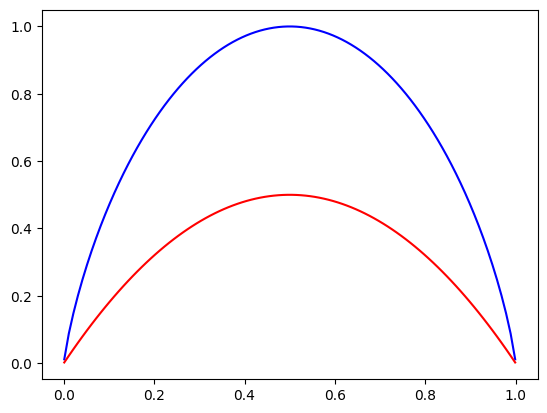

In [4]:
plot_x = np.linspace(0.001,0.999,100)
plt.plot(plot_x, entropy(plot_x), color = 'blue')
plt.plot(plot_x, gini(plot_x), color = 'red')

In [5]:
from sklearn.datasets import load_iris
iris = load_iris()
x = iris.data[:,1:3]
y = iris.target

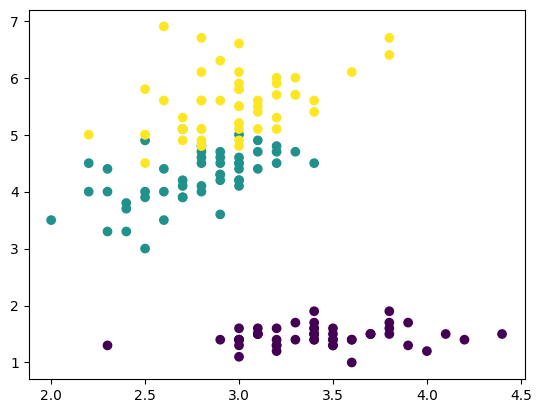

In [6]:
plt.scatter(x[:,0],x[:,1], c=y)

### 决策树

In [7]:
from sklearn.tree import DecisionTreeClassifier

In [8]:
clf = DecisionTreeClassifier(max_depth=2, criterion='gini')

In [9]:
clf.fit(x,y)

DecisionTreeClassifier(max_depth=2)

In [10]:
def plot_decision_boundary(x, y, model):
    x1_min, x1_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    x2_min, x2_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    
    x1, x2 = np.meshgrid(np.arange(x1_min, x1_max, 0.01), np.arange(x2_min, x2_max, 0.01))
    print(x1.shape, x2.shape)
    z = model.predict(np.c_[x1.ravel(), x2.ravel()])
    z = z.reshape(x1.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#F5B9EF', '#BBFFBB', '#F9F9CB'])

    plt.contourf(x1,x2,z,cmap=custom_cmap)
    plt.scatter(x[:,0], x[:,1], c=y)
    plt.show()

(790, 440) (790, 440)


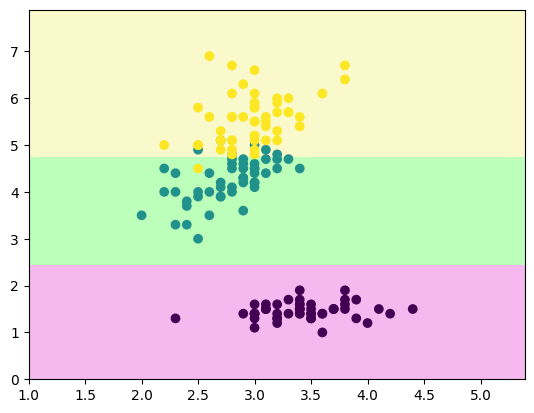

In [11]:
plot_decision_boundary(x, y, clf)

[Text(0.4, 0.8333333333333334, 'x[1] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.6, 0.5, 'x[1] <= 4.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.043\nsamples = 45\nvalue = [0, 44, 1]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.194\nsamples = 55\nvalue = [0, 6, 49]')]

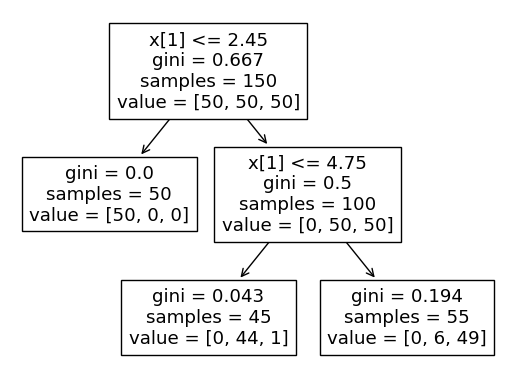

In [12]:
from sklearn.tree import plot_tree
plot_tree(clf)

In [13]:
clf.score(x,y)

0.9533333333333334

### 寻找最优划分条件

In [14]:
from collections import Counter
Counter(y)

Counter({0: 50, 1: 50, 2: 50})

In [15]:
def calc_entropy(y):
    counter = Counter(y)
    sum_ent = 0
    for i in counter:
        p = counter[i] / len(y)
        sum_ent += (-p * np.log2(p))
    return sum_ent

In [16]:
calc_entropy(y)

1.584962500721156

In [17]:
def calc_gini(y):
    counter = Counter(y)
    sum_gini = 1
    for i in counter:
        p = counter[i] / len(y)
        sum_gini -= p**2
    return sum_gini

In [18]:
calc_gini(y)

0.6666666666666665

In [19]:
def split_dataset(x, y, dim, value):
    index_left = (x[:, dim] <= value)
    index_right = (x[:,dim] > value)
    return x[index_left], y[index_left], x[index_right], y[index_right]

In [20]:
x.shape

(150, 2)

In [21]:
def find_best_split(x, y):
    best_dim = -1
    best_value = -1
    best_gini = np.inf
    best_gini_left, best_gini_right = -1, -1
    for dim in range(x.shape[1]):    # 特征x2
        sorted_index = np.argsort(x[:, dim])
        for i in range(x.shape[0] - 1):    # 特征x1
            value_left, value_right = x[sorted_index[i], dim], x[sorted_index[i+1], dim]
            if value_left != value_right: 
                value = (value_left + value_right) / 2
                x_left, y_left, x_right, y_right = split_dataset(x, y, dim, value)
                gini_left, gini_right = calc_gini(y_left), calc_gini(y_right)
                gini = (len(x_left) * gini_left + len(x_right) * gini_right) / x.shape[0]    # 加权平均值
                if gini < best_gini:
                    best_dim = dim
                    best_value = value
                    best_gini = gini
                    best_gini_left, best_gini_right = gini_left, gini_right
    return best_dim, best_value, best_gini, best_gini_left, best_gini_right

In [22]:
find_best_split(x, y)

(1, 2.45, 0.3333333333333333, 0.0, 0.5)

In [23]:
x_left, y_left, x_right, y_right = split_dataset(x, y, 1, 2.45)

In [24]:
find_best_split(x_right, y_right)

(1, 4.75, 0.12646464646464653, 0.04345679012345684, 0.19438016528925628)